**JAUME PARDO SOCIAS**

GitHub: https://github.com/JaumePardo/FifaPractice

# Fifa practice

Queremos predecir el valor de los jugadores usando la informacion de cada jugador. Por eso primero trataremos los datos, los normalizaremos y usaremos un modelo de regresión lineal para predecir el valor.

## Importamos las librerias

Primero de todo debemos importar algunas librerias para poder trabajar con valores numericos y dataframes

In [1]:
import os

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import pandas as pd
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')

## Leemos los datos

Para leer los datos utilizamos la libreria ``pandas``


In [2]:
df = pd.read_csv("fifa.csv")
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,€60K,€1K,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,

## Analisis de datos

Primeramente queremos saber que le estan pasando los datos. Para esto necesitamos poder mostrar todas las columnas de la tabla. Tambien mostraremos la estructura de los datos numericos.


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000

In [6]:
df = df.iloc[:, 2:]

Podemos ver como las dos primeras columnas no nos dan información importante para poder predecir el valor del jugador.
Tambien las columnas del nombre del jugador, **Name** , la foto del jugador,**Photo**, y la cara, **Real Face** no son importantes ya que cada jugador tendrá su propio valor y no nos serviran para predecir.
Tambien la foto de la bandera del pais, **Flag** , y el logo del club, **Club Logo**, no nos aportaran nueva informacion importante si ya tenemos la nacionalidad de cada jugador y el nombre de su club. 
Aparte la columna **Special** depende de las puntuaciones de las diferentes posiciones del jugador, por esto tampoco nos aportan nueva información.
Tampoco las columnas de cuando se ha unido el jugador al club, **Joined** , y cuando terminará su contrato nos aportara información, **Contract Valid Until** , así que podemos eliminar todas estas columnas.

In [7]:
df = df.drop(columns = ["Name","Photo","Flag","Club Logo","Real Face","Joined","Special","Contract Valid Until"],axis=1)

# Handle NaNs

Podemos ver las columnas que tienen almenos un NaN.


In [8]:
df.columns[df.isna().any()].tolist()

['Club',
 'Preferred Foot',
 'International Reputation',
 'Weak Foot',
 'Skill Moves',
 'Work Rate',
 'Body Type',
 'Position',
 'Jersey Number',
 'Loaned From',
 'Height',
 'Weight',
 'LS',
 'ST',
 'RS',
 'LW',
 'LF',
 'CF',
 'RF',
 'RW',
 'LAM',
 'CAM',
 'RAM',
 'LM',
 'LCM',
 'CM',
 'RCM',
 'RM',
 'LWB',
 'LDM',
 'CDM',
 'RDM',
 'RWB',
 'LB',
 'LCB',
 'CB',
 'RCB',
 'RB',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes',
 'Release Clause']

In [9]:
df[df.isna().any(axis=1)]

,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Loaned From,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,NaN,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,NaN,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,NaN,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,NaN,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,NaN,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,England,47,65,Crewe Alexandra,€60K,€1K,Right,1.0,2.0,2.0,Medium/ Medium,Lean,CM,22.0,NaN,5'9,134lbs,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2,45+2,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,Right,1.0,2.0,2.0,Medium/ Medium,Normal,ST,21.0,NaN,6'3,170lbs,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,40+2,38+2,35+2,35+2,35+2,38+2,30+2,31+2,31+2,31+2,30+2,29+2,32+2,32+2,32+2,29+2,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,16,England,47,67,Cambridge United,€60K,€1K,Right,1.0,3.0,2.0,Medium/ Medium,Normal,ST,33.0,NaN,5'8,148lbs,45+2,45+2,45+2,45+2,46+2,46+2,46+2,45+2,44+2,44+2,44+2

## Club y Loaned From

Podemos ver que hay muchos de jugadores que tienen al menos un atriubuto a NaN. Por eso no podemos quitar todos estos jugadores ya que sino nos quedaríamos con pocos jugadores para hacer la predicción.
Podemos ver muchas columnas que tienen casi siempre NaN así como la columna **Loaned From**. Algun problema con las columnas de David DeGea. También podemos ver como la columna club tiene NaN. Que podemos hacer?



In [10]:
df.loc[df.Club != df.Club]

,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Loaned From,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
452,24,Argentina,80,85,NaN,€0,€0,Right,2.0,4.0,4.0,Medium/ Medium,Normal,CM,5.0,NaN,5'11,165lbs,71+2,71+2,71+2,75+2,75+2,75+2,75+2,75+2,77+2,77+2,77+2,76+2,79+2,79+2,79+2,76+2,75+2,77+2,77+2,77+2,75+2,74+2,72+2,72+2,72+2,74+2,76.0,55.0,60.0,84.0,73.0,78.0,79.0,78.0,82.0,82.0,75.0,69.0,77.0,74.0,77.0,82.0,61.0,79.0,69.0,80.0,79.0,72.0,74.0,82.0,57.0,74.0,73.0,75.0,72.0,9.0,14.0,6.0,9.0,10.0,NaN
538,33,Sweden,80,80,NaN,€0,€0,Right,2.0,4.0,2.0,High/ Medium,Normal,LCB,4.0,NaN,6'4,185lbs,62+2,62+2,62+2,56+2,58+2,58+2,58+2,56+2,58+2,58+2,58+2,57+2,64+2,64+2,64+2,57+2,68+2,74+2,74+2,74+2,68+2,70+2,79+2,79+2,79+2,70+2,49.0,51.0,81.0,73.0,37.0,49.0,36.0,40.0,67.0,63.0,46.0,49.0,55.0,76.0,36.0,74.0,64.0,67.0,83.0,59.0,81.0,82.0,54.0,49.0,79.0,78.0,82.0,83.0,79.0,7.0,9.0,12.0,10.0,15.0,NaN
568,26,Russia,79,81,NaN,€0,€0,Right,1.0,3.0,1.0,Medium/ Medium,Normal,GK,12.0,NaN,6'2,176lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,14.0,17.0,25.0,13.0,15.0,18.0,17.0,32.0,17.0,58.0,54.0,36.0,76.0,50.0,24.0,60.0,27.0,70.0,13.0,26.0,20.0,11.0,63.0,15.0,69.0,18.0,20.0,12.0,80.0,73.0,65.0,77.0,85.0,NaN
677,29,Russia,79,79,NaN,€0,€0,Right,2.0,3.0,3.0,High/ High,Lean,RB,2.0,NaN,5'10,154lbs,70+2,70+2,70+2,73+2,72+2,72+2,72+2,73+2,73+2,73+2,73+2,75+2,74+2,74+2,74+2,75+2,78+2,75+2,75+2,75+2,78+2,78+2,73+2,73+2,73+2,78+2,73.0,61.0,69.0,79.0,57.0,72.0,49.0,46.0,75.0,72.0,84.0,90.0,80.0,75.0,76.0,67.0,85.0,93.0,68.0,57.0,65.0,71.0,77.0,72.0,41.0,73.0,76.0,76.0,80.0,7.0,12.0,10.0,8.0,15.0,NaN
874,29,Russia,78,78,NaN,€0,€0,Right,2.0,3.0,3.0,High/ Medium,Stocky,ST,22.0,NaN,6'5,201lbs,77+2,77+2,77+2,71+2,74+2,74+2,74+2,71+2,71+2,71+2,71+2,71+2,66+2,66+2,66+2,71+2,52+2,52+2,52+2,52+2,52+2,48+2,48+2,48+2,48+2,48+2,61.0,79.0,86.0,71.0,74.0,71.0,64.0,60.0,55.0,77.0,66.0,65.0,50.0,75.0,32.0,78.0,63.0,77.0,93.0,68.0,75.0,30.0,78.0,73.0,77.0,70.0,21.0,15.0,19.0,15.0,12.0,11.0,11.0,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17197,21,India,55,64,NaN,€0,€0,Right,1.0,2.0,1.0,Medium/ Medium,Normal,GK,1.0,NaN,6'2,176lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,7.0,13.0,16.0,7.0,11.0,10.0,13.0,16.0,18.0,29.0,32.0,24.0,55.0,36.0,24.0,47.0,16.0,56.0,9.0,21.0,10.0,8.0,29.0,13.0,29.0,8.0,12.0,11.0,55.0,50.0,57.0,59.0,53.0,NaN
17215,26,Finland,55,57,NaN,€0,€0,Right,1.0,3.0,2.0,Medium/ High,Normal,RB,3.0,NaN,6'4,187lbs,46+2,46+2,46+2,45+2,44+2,44+2,44+2,45+2,43+2,43+2,43+2,46+2,43+2,43+2,43+2,46+2,51+2,49+2,49+2,49+2,51+2,53+2,57+2,57+2,57+2,53+2,42.0,41.0,65.0,45.0,26.0,50.0,30.0,32.0,35.0,40.0,65.0,55.0,58.0,49.0,42.0,29.0,61.0,56.0,76.0,26.0,48.0,54.0,46.0,36.0,33.0,36.0,51.0,58.0,64.0,11.0,9.0,9.0,12.0,12.0,NaN
17339,23,India,54,63,NaN,€0,€0,Right,1.0,3.0,2.0,Medium/ Low,Normal,NaN,NaN,NaN,5'9,143lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,56.0,49.0,38.0,38.0,53.0,37.0,33.0,33.0,43.0,66.0,68.0,57.0,49.0,58.0,50.0,55.0,59.0,62.0,47.0,39.0,34.0,57.0,43.0,58.0,45.0,14.0

El problema es que hay jugadores que su club no esta en el FIFA. Por ejemplo el jugador A. Granqvist.
Como hay pocos jugadores en relacion al total, con el club igual a NaN, podemos intentar de eliminarlos. Lo podemos hacer utilizando la siguiente instruccion.

In [11]:
df = df.dropna(subset = ['Club'])
df

,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Loaned From,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,NaN,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,NaN,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,NaN,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,NaN,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,NaN,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,England,47,65,Crewe Alexandra,€60K,€1K,Right,1.0,2.0,2.0,Medium/ Medium,Lean,CM,22.0,NaN,5'9,134lbs,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2,45+2,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,Right,1.0,2.0,2.0,Medium/ Medium,Normal,ST,21.0,NaN,6'3,170lbs,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,40+2,38+2,35+2,35+2,35+2,38+2,30+2,31+2,31+2,31+2,30+2,29+2,32+2,32+2,32+2,29+2,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,16,England,47,67,Cambridge United,€60K,€1K,Right,1.0,3.0,2.0,Medium/ Medium,Normal,ST,33.0,NaN,5'8,148lbs,45+2,45+2,45+2,45+2,46+2,46+2,46+2,45+2,44+2,44+2,44+2

Ya hemos quitado todos los jugadores del que no sabemos el Club. Aun así seguimos teniendo un problema, como utilizamos esta información para un algoritmo?
Primeramente vamos a cambiar los valores de los jugadores que han sido cedidos por un club. Para poder saber a que club pertenecen realmente vamos a cambiar su club actual por el club que lo han cedido. Por esto primero rellenaremos con un 0 a todos los jugadores que no han sido cedidos

In [12]:
df[df.isna()["Loaned From"]==False]

,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Loaned From,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
28,26,Colombia,88,89,FC Bayern München,€69.5M,€315K,Left,4.0,3.0,4.0,Medium/ Medium,Normal,LAM,10.0,Real Madrid,5'11,172lbs,80+3,80+3,80+3,84+3,83+3,83+3,83+3,84+3,85+3,85+3,85+3,83+3,81+3,81+3,81+3,83+3,69+3,68+3,68+3,68+3,69+3,65+3,58+3,58+3,58+3,65+3,90.0,83.0,62.0,89.0,90.0,85.0,89.0,86.0,83.0,90.0,73.0,67.0,83.0,85.0,76.0,86.0,54.0,70.0,68.0,92.0,64.0,55.0,80.0,89.0,81.0,87.0,52.0,41.0,44.0,15.0,15.0,15.0,5.0,14.0,NaN
38,30,Argentina,88,88,Milan,€57M,€245K,Right,4.0,4.0,3.0,High/ Medium,Normal,LS,9.0,Juventus,6'1,196lbs,85+3,85+3,85+3,81+3,83+3,83+3,83+3,81+3,80+3,80+3,80+3,78+3,71+3,71+3,71+3,78+3,55+3,53+3,53+3,53+3,55+3,51+3,48+3,48+3,48+3,51+3,68.0,92.0,80.0,75.0,90.0,84.0,74.0,62.0,59.0,85.0,73.0,73.0,75.0,86.0,69.0,86.0,79.0,70.0,85.0,80.0,50.0,20.0,92.0,74.0,70.0,86.0,35.0,22.0,18.0,5.0,12.0,7.0,5.0,10.0,NaN
91,29,Brazil,85,85,Guangzhou Evergrande Taobao FC,€37M,€235K,Right,3.0,3.0,3.0,High/ High,Lean,LDM,9.0,FC Barcelona,6'0,157lbs,81+3,81+3,81+3,79+3,81+3,81+3,81+3,79+3,81+3,81+3,81+3,79+3,82+3,82+3,82+3,79+3,78+3,81+3,81+3,81+3,78+3,78+3,80+3,80+3,80+3,78+3,64.0,81.0,85.0,84.0,75.0,82.0,66.0,72.0,80.0,84.0,73.0,73.0,69.0,84.0,66.0,83.0,90.0,92.0,81.0,80.0,81.0,81.0,84.0,78.0,71.0,80.0,75.0,81.0,73.0,16.0,16.0,11.0,6.0,8.0,NaN
166,24,Brazil,83,90,Guangzhou Evergrande Taobao FC,€36.5M,€18K,Left,2.0,4.0,4.0,High/ Medium,Normal,CAM,24.0,SL Benfica,6'3,176lbs,80+2,80+2,80+2,81+2,81+2,81+2,81+2,81+2,81+2,81+2,81+2,80+2,79+2,79+2,79+2,80+2,69+2,69+2,69+2,69+2,69+2,67+2,64+2,64+2,64+2,67+2,78.0,80.0,77.0,81.0,76.0,82.0,86.0,87.0,79.0,84.0,77.0,76.0,76.0,79.0,65.0,84.0,58.0,76.0,72.0,88.0,67.0,58.0,86.0,81.0,71.0,74.0,55.0,62.0,42.0,13.0,11.0,13.0,12.0,10.0,NaN
176,24,Croatia,83,89,Chelsea,€35M,€165K,Right,3.0,4.0,4.0,High/ High,Normal,LCM,17.0,Real Madrid,5'9,172lbs,71+3,71+3,71+3,79+3,78+3,78+3,78+3,79+3,81+3,81+3,81+3,80+3,82+3,82+3,82+3,80+3,76+3,78+3,78+3,78+3,76+3,74+3,69+3,69+3,69+3,74+3,73.0,62.0,42.0,87.0,76.0,88.0,78.0,68.0,82.0,89.0,84.0,74.0,81.0,70.0,85.0,79.0,63.0,82.0,65.0,75.0,77.0,78.0,69.0,88.0,59.0,72.0,69.0,75.0,63.0,9.0,5.0,6.0,7.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17978,21,England,51,57,Hamilton Academical FC,€50K,€3K,Right,1.0,2.0,2.0,Medium/ Medium,Lean,ST,16.0,Norwich City,5'11,165lbs,49+2,49+2,49+2,49+2,49+2,49+2,49+2,49+2,47+2,47+2,47+2,47+2,40+2,40+2,40+2,47+2,34+2,31+2,31+2,31+2,34+2,33+2,30+2,30+2,30+2,33+2,34.0,53.0,44.0,38.0,40.0,50.0,39.0,26.0,33.0,48.0,64.0,74.0,56.0,49.0,65.0,42.0,62.0,48.0,60.0,43.0,35.0,16.0,47.0,45.0,62.0,49.0,14.0,13.0,13.0,12.0,13.0,16.0,9.0,14.0,NaN
17979,21,China PR,51,60,Guizhou Hengfeng FC,€60K,€2K,Right,1.0,2.0,2.0,Medium/ Medium,Normal,CM,8.0,Tianjin Quanjian FC,6'0,172lbs,49+2,49+2,49+2,50+2,50+2,50+2,50+2,50+2,50+2,50+2,50+2,51+2,50+2,50+2,50+2,51+2,50+2,50+2,50+2,50+2,50+2,50+2,49+2,49+2,49+2,50+2,36.0,30.0,48.0,57.0,32.0,45.0,37.0,38.0,55.0,50.0,71.0,76.0,75.0,55.0,58.0,55.0,60.0,62.0,61.0,33.0,58.0,41.0,53.0,47.0,36.0,43.0,47.0,41.0,46.0,12.0,12.0,10.0,13.0,9.0,NaN
18026,21,China PR,50,59,Guizhou Hengfeng FC,€50K,€2K,Right,1.0,2.0,2

In [13]:
df.iloc[38]["Club"]

'Milan'

In [14]:
df.iloc[38]["Loaned From"]

'Juventus'

Para cambiar el club que lo han cedido por el club original, primero vamos a rellenar los NaN de la columnas de cedidos por 0.

In [15]:
df["Loaned From"].fillna(0,inplace = True)

Con la siguiente instrucción cambiaremos los valores del club a los que estan en la columna Loaned From, si estos no estan con un 0.


In [16]:
df['Club'] = np.where(df['Loaned From'] != 0, df['Loaned From'], df["Club"])

Comprobamos que el procedimiento ha funcionado y un jugador que tenia el Club y el Loaned From diferente, ahora lo tienen igual

In [17]:
df.iloc[38]["Club"]

'Juventus'

In [18]:
df.iloc[38]["Loaned From"]

'Juventus'

Finalmente hacemos un one hot encoding con la columna club. Es decir, crearemos una columna para cada valor posible de la columa club y se indicara si el jugador esta en este club con un 1 y sino con un 0. Al final, cada jugador solo tendrà un 1 en una de estas columnas de clubs.

In [19]:
clb = df.pop("Club")

df = pd.concat([df.reset_index(drop=True), pd.get_dummies(clb, prefix='clb').reset_index(drop=True)], axis=1, sort=False)
df.head()

,Age,Nationality,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Loaned From,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,clb_ SSV Jahn Regensburg,clb_1. FC Heidenheim 1846,clb_1. FC Kaiserslautern,clb_1. FC Köln,clb_1. FC Magdeburg,clb_1. FC Nürnberg,clb_1. FC Union Berlin,clb_1. FSV Mainz 05,clb_AC Ajaccio,clb_AC Horsens,clb_AD Alcorcón,clb_ADO Den Haag,clb_AEK Athens,clb_AFC Wimbledon,clb_AIK,clb_AJ Auxerre,clb_AS Béziers,clb_AS Monaco,clb_AS Nancy Lorraine,clb_AS Saint-Étienne,clb_AZ Alkmaar,clb_Aalborg BK,clb_Aarhus GF,clb_Aberdeen,clb_Accrington Stanley,clb_Adelaide United,clb_Ajax,clb_Akhisar Belediyespor,clb_Al Ahli,clb_Al Batin,clb_Al Faisaly,clb_Al Fateh,clb_Al Fayha,clb_Al Hazem,clb_Al Hilal,clb_Al Ittihad,clb_Al Nassr,clb_Al Qadisiyah,clb_Al Raed,clb_Al Shabab,clb_Al Taawoun,clb_Al Wehda,clb_Alanyaspor,clb_Albacete BP,clb_Alianza Petrolera,clb_Amiens SC,clb_América FC (Minas Gerais),clb_América de Cali,clb_Angers SCO,clb_Antalyaspor,clb_Argentinos Juniors,clb_Arka Gdynia,clb_Arsenal,clb_Ascoli,clb_Aston Villa,clb_Atalanta,clb_Athletic Club de Bilbao,clb_Atiker Konyaspor,clb_Atlanta United,clb_Atlético Bucaramanga,clb_Atlético Huila,clb_Atlético Madrid,clb_Atlético Mineiro,clb_Atlético Nacional,clb_Atlético Paranaense,clb_Atlético Tucumán,clb_Audax Italiano,clb_BB Erzurumspor,clb_BK Häcken,clb_BSC Young Boys,clb_Bahia,clb_Barnsley,clb_Bayer 04 Leverkusen,clb_Beijing Renhe FC,clb_Beijing Sinobo Guoan FC,clb_Belgrano de Córdoba,clb_Benevento,clb_Beşiktaş JK,clb_Birmingham City,clb_Blackburn Rovers,clb_Blackpool,clb_Boavista FC,clb_Boca Juniors,clb_Bohemian FC,clb_Bologna,clb_Bolton Wanderers,clb_Borussia Dortmund,clb_Borussia Mönchengladbach,clb_Botafogo,clb_Bournemouth,clb_Boyacá Chicó FC,clb_Bradford City,clb_Bray Wanderers,clb_Brentford,clb_Brescia,clb_Brighton & Hove Albion,clb_Brisbane Roar,clb_Bristol City,clb_Bristol Rovers,clb_Brøndby IF,clb_Burnley,clb_Bursaspor,clb_Burton Albion,clb_Bury,clb_CA Osasuna,clb_CD Antofagasta,clb_CD Aves,clb_CD Everton de Viña del Mar,clb_CD Feirense,clb_CD Huachipato,clb_CD Leganés,clb_CD Lugo,clb_CD Nacional,clb_CD Numancia,clb_CD O'Higgins,clb_CD Palestino,clb_CD Tenerife,clb_CD Tondela,clb_CD Universidad de Concepción,clb_CF Rayo Majadahonda,clb_CF Reus Deportiu,clb_Cagliari,clb_Cambridge United,clb_Cardiff City,clb_Carlisle United,clb_Carpi,clb_Ceará Sporting Club,clb_Celtic,clb_Central Coast Mariners,clb_Cerezo Osaka,clb_Chamois Niortais Football Club,clb_Changchun Yatai FC,clb_Chapecoense,clb_Charlton Athletic,clb_Chelsea,clb_Cheltenham Town,clb_Chicago Fire,clb_Chievo Verona,clb_Chongqing Dangdai Lifan FC SWM Team,clb_Cittadella,clb_Clermont Foot 63,clb_Club América,clb_Club Atlas,clb_Club Atlético Aldosivi,clb_Club Atlético Banfield,clb_Club Atlético Colón,clb_Club Atlético Huracán,clb_Club Atlético Lanús,clb_Club Atlético Talleres,clb_Club Atlético Tigre,clb_Club Brugge KV,clb_Club Deportes Temuco,clb_Club León,clb_Club Necaxa,clb_Club Tijuana,clb_Clube Sport Marítimo,clb_Colchester United,clb_Colo-Colo,clb_Colorado Rapids,clb_Columbus Crew SC,clb_Cork City,clb_Cosenza,clb_Coventry City,clb_Cracovia,clb_Crawley Town,clb_Crewe Alexandra,clb_Crotone,clb_Cruz Azul,clb_Cruzeiro,clb_Crystal Palace,clb_Curicó Unido,clb_Cádiz CF,clb_Córdoba CF,clb_DC United,clb_DSC Arminia Bielefeld,clb_Daegu FC,clb_Dalian YiFang FC,clb_Dalkurd FF,clb_De Graafschap,clb_Defensa y Justicia,clb_Deportes Iquique,clb_Deportes Tolima,clb_Deportivo Alavés,clb_Deportivo Cali,clb_Deportivo Pas

## Value, Release Clause, Wage
Tambien tenemos un problema en nuestra variable objetivo **Value**, no tiene ningun NaN pero no es un numero. Por esto crearemos una función para convertir de formato texto a formato numérico.

In [20]:
df["Value"].isna().sum()

0

In [21]:
def value_to_float(x):
    """
    From K and M to float.
    
    """
    x = x.replace('€', '')
    ret_val = 0.0
    
    if type(x) == float or type(x) == int:
        ret_val = x
    if 'K' in x:
        if len(x) > 1:
            ret_val = float(x.replace('K', ''))
        ret_val = ret_val *1000
    if 'M' in x:
        if len(x) > 1:
            ret_val = float(x.replace('M', ''))
        ret_val = ret_val * 1000000.0
    return ret_val

Tambien podemos observar como la columna de **Release Clause** tiene valores NaN. Estos valores son debidos a que su clausula de liberación ya ha terminado. Por esto podemos cambiar todos los NaN por la media ya que es una columna importante y hay bastantes jugadores con NaN.

In [22]:
df["Release Clause"].isna().sum()

1323

In [23]:
mitjanaReleaseClause = df[df["Release Clause"].isna()==False]["Release Clause"].apply(value_to_float).mean()
df["Release Clause"].fillna(str(mitjanaReleaseClause),inplace = True)

Ahora ya si que podemos aplicar la función sobre todas las columnas con valores en euros.



In [24]:
df["Value"] = df["Value"].apply(value_to_float)
df["Wage"] = df["Wage"].apply(value_to_float)
df["Release Clause"] = df["Release Clause"].apply(value_to_float)
df.head()

,Age,Nationality,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Loaned From,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,clb_ SSV Jahn Regensburg,clb_1. FC Heidenheim 1846,clb_1. FC Kaiserslautern,clb_1. FC Köln,clb_1. FC Magdeburg,clb_1. FC Nürnberg,clb_1. FC Union Berlin,clb_1. FSV Mainz 05,clb_AC Ajaccio,clb_AC Horsens,clb_AD Alcorcón,clb_ADO Den Haag,clb_AEK Athens,clb_AFC Wimbledon,clb_AIK,clb_AJ Auxerre,clb_AS Béziers,clb_AS Monaco,clb_AS Nancy Lorraine,clb_AS Saint-Étienne,clb_AZ Alkmaar,clb_Aalborg BK,clb_Aarhus GF,clb_Aberdeen,clb_Accrington Stanley,clb_Adelaide United,clb_Ajax,clb_Akhisar Belediyespor,clb_Al Ahli,clb_Al Batin,clb_Al Faisaly,clb_Al Fateh,clb_Al Fayha,clb_Al Hazem,clb_Al Hilal,clb_Al Ittihad,clb_Al Nassr,clb_Al Qadisiyah,clb_Al Raed,clb_Al Shabab,clb_Al Taawoun,clb_Al Wehda,clb_Alanyaspor,clb_Albacete BP,clb_Alianza Petrolera,clb_Amiens SC,clb_América FC (Minas Gerais),clb_América de Cali,clb_Angers SCO,clb_Antalyaspor,clb_Argentinos Juniors,clb_Arka Gdynia,clb_Arsenal,clb_Ascoli,clb_Aston Villa,clb_Atalanta,clb_Athletic Club de Bilbao,clb_Atiker Konyaspor,clb_Atlanta United,clb_Atlético Bucaramanga,clb_Atlético Huila,clb_Atlético Madrid,clb_Atlético Mineiro,clb_Atlético Nacional,clb_Atlético Paranaense,clb_Atlético Tucumán,clb_Audax Italiano,clb_BB Erzurumspor,clb_BK Häcken,clb_BSC Young Boys,clb_Bahia,clb_Barnsley,clb_Bayer 04 Leverkusen,clb_Beijing Renhe FC,clb_Beijing Sinobo Guoan FC,clb_Belgrano de Córdoba,clb_Benevento,clb_Beşiktaş JK,clb_Birmingham City,clb_Blackburn Rovers,clb_Blackpool,clb_Boavista FC,clb_Boca Juniors,clb_Bohemian FC,clb_Bologna,clb_Bolton Wanderers,clb_Borussia Dortmund,clb_Borussia Mönchengladbach,clb_Botafogo,clb_Bournemouth,clb_Boyacá Chicó FC,clb_Bradford City,clb_Bray Wanderers,clb_Brentford,clb_Brescia,clb_Brighton & Hove Albion,clb_Brisbane Roar,clb_Bristol City,clb_Bristol Rovers,clb_Brøndby IF,clb_Burnley,clb_Bursaspor,clb_Burton Albion,clb_Bury,clb_CA Osasuna,clb_CD Antofagasta,clb_CD Aves,clb_CD Everton de Viña del Mar,clb_CD Feirense,clb_CD Huachipato,clb_CD Leganés,clb_CD Lugo,clb_CD Nacional,clb_CD Numancia,clb_CD O'Higgins,clb_CD Palestino,clb_CD Tenerife,clb_CD Tondela,clb_CD Universidad de Concepción,clb_CF Rayo Majadahonda,clb_CF Reus Deportiu,clb_Cagliari,clb_Cambridge United,clb_Cardiff City,clb_Carlisle United,clb_Carpi,clb_Ceará Sporting Club,clb_Celtic,clb_Central Coast Mariners,clb_Cerezo Osaka,clb_Chamois Niortais Football Club,clb_Changchun Yatai FC,clb_Chapecoense,clb_Charlton Athletic,clb_Chelsea,clb_Cheltenham Town,clb_Chicago Fire,clb_Chievo Verona,clb_Chongqing Dangdai Lifan FC SWM Team,clb_Cittadella,clb_Clermont Foot 63,clb_Club América,clb_Club Atlas,clb_Club Atlético Aldosivi,clb_Club Atlético Banfield,clb_Club Atlético Colón,clb_Club Atlético Huracán,clb_Club Atlético Lanús,clb_Club Atlético Talleres,clb_Club Atlético Tigre,clb_Club Brugge KV,clb_Club Deportes Temuco,clb_Club León,clb_Club Necaxa,clb_Club Tijuana,clb_Clube Sport Marítimo,clb_Colchester United,clb_Colo-Colo,clb_Colorado Rapids,clb_Columbus Crew SC,clb_Cork City,clb_Cosenza,clb_Coventry City,clb_Cracovia,clb_Crawley Town,clb_Crewe Alexandra,clb_Crotone,clb_Cruz Azul,clb_Cruzeiro,clb_Crystal Palace,clb_Curicó Unido,clb_Cádiz CF,clb_Córdoba CF,clb_DC United,clb_DSC Arminia Bielefeld,clb_Daegu FC,clb_Dalian YiFang FC,clb_Dalkurd FF,clb_De Graafschap,clb_Defensa y Justicia,clb_Deportes Iquique,clb_Deportes Tolima,clb_Deportivo Alavés,clb_Deportivo Cali,clb_Deportivo Pas

##Nationality, Work Rate y Position
Podemos hacer el mismo procedimiento que en el club pero con la nacionalidad. Aplicar un one hot encoding para cada valor de nacionalidad.

In [25]:
nat = df.pop("Nationality")
df = pd.concat([df.reset_index(drop=True), pd.get_dummies(nat, prefix='nat').reset_index(drop=True)], axis=1, sort=False)

Para la variable categorica **Work Rate** realizaremos un one hot encoding para poder pasarlo a variables numericas y que el algoritmo las pueda utilizar. Tambien podemos ver que solo hay 48 variables con el **Work Rate** a NaN así que los podemos eliminar.


In [26]:
df["Work Rate"].value_counts()

Medium/ Medium    9685
High/ Medium      3131
Medium/ High      1660
High/ High        1007
Medium/ Low        840
High/ Low          686
Low/ Medium        440
Low/ High          435
Low/ Low            34
Name: Work Rate, dtype: int64

In [27]:
df["Work Rate"].isna().sum()

48

In [28]:
df = df.dropna(subset = ['Work Rate'])
WR = df.pop("Work Rate")
df = pd.concat([df.reset_index(drop=True), pd.get_dummies(WR, prefix='wr').reset_index(drop=True)], axis=1, sort=False)

Para la variable categorica **Position** tambien realizaremos un one hot 
encoding para poder pasarlo a variables numericas y que el algoritmo las pueda utilizar. Tambien podemos ver que no hay ningun valor NaN, así que podemos hacer el one hot encoding sin problemas.

In [29]:
df["Position"].isna().sum()

0

In [30]:
pos = df.pop("Position")
df = pd.concat([df.reset_index(drop=True), pd.get_dummies(pos, prefix='pos').reset_index(drop=True)], axis=1, sort=False)

## Preferred Foot y Loaned From
Podemos observar que el columna del pie dominante solo puede tener dos valores posibles: zurdo o diesto. Por esto para pasarlo a valores numericos basta aplicar una función lambda que si el valor es diestro se indique con un 1 y en caso contrario con un 0. Podemos ver que solo hay 48 NaN y por esto los podemos eliminar

In [31]:
df["Preferred Foot"].isna().sum()

0

In [32]:
df["Preferred Foot"].value_counts()

Right    13756
Left      4162
Name: Preferred Foot, dtype: int64

In [33]:
df["Preferred Foot"] = df["Preferred Foot"].apply(lambda x: 1 if x=="Right" else 0)

Tambien cambiaremos los datos de la columna **Loaned From**. En este caso si la columna ya tenia un 0 (un NaN anteriormente) lo dejaremos con un 0 y si tenia el nombre de un equipo le pondremos un 1. 

In [34]:
df["Loaned From"] = df["Loaned From"].apply(lambda x: 1 if x!=0 else 0)

In [35]:
df["Loaned From"].value_counts()

0    16654
1     1264
Name: Loaned From, dtype: int64

## Body Type
En el caso de la variable **BodyType**, podemos observar que hay clases que solo aparecen una vez. Estas clases las podemos substituir por la clase moda, que en nuestro caso sera Normal. Eso lo hacemos aplicando una funcion tractamentBodyType a todos los valores de esta columna.
Finalmente haremos un one hot encoding con esta variable.


In [36]:
df["Body Type"].value_counts()

Normal                 10436
Lean                    6351
Stocky                  1124
Akinfenwa                  1
C. Ronaldo                 1
Shaqiri                    1
Messi                      1
PLAYER_BODY_TYPE_25        1
Courtois                   1
Neymar                     1
Name: Body Type, dtype: int64

In [37]:
moda = df["Body Type"].mode()[0]

In [38]:
def tratamientoBodyType(x):
  if x == "Normal" or x == "Lean" or x == "Stocky":
    return x
  return moda

In [39]:
df["Body Type"] = df["Body Type"].apply(tratamientoBodyType)

In [40]:
body = df.pop("Body Type")
df = pd.concat([df.reset_index(drop=True), pd.get_dummies(body, prefix='body').reset_index(drop=True)], axis=1, sort=False)

## Weight
La variable del peso es una cadena de texto que tendremos que transformar a numerica. El problema es que al final de cada medida tiene puesto las unidades que usa para representar el peso. Podemos ver que todo esta en libras, por esto basta eliminar el sufijo "lbs". Para esto utilizaremos la funcion rstrip en todos los valores de la columna **Weight**

In [41]:
print(type(df.iloc[0]["Weight"]))
df["Weight"].isna().sum()

<class 'str'>


0

In [42]:
df = df.dropna(subset = ['Weight'])

In [43]:
def tratamientoWeight(x):
  x=x.rstrip("lbs")
  return float(x)

In [44]:
df["Weight"] = df["Weight"].apply(tratamientoWeight)

## Height
Tambien tendremos que cambiar los valores de la columna **Height**. Podemos ver que los datos de la altura estan en pies y pulgadas separados por una coma. Podemos crear una función para separar los dos numeros por la coma, multiplicarlos por su conversion a cm y sumarlos.

In [45]:
def ConvertirAltura(x):
  x=x.split("'")
  pie = float(x[0]) * 30.48
  pulgada = float(x[1]) * 2.54
  return pie + pulgada

In [46]:
df["Height"].isna().sum()

0

In [47]:
df["Height"] = df["Height"].apply(ConvertirAltura)

## Porteros
Ahora arreglaremos las variables que nos indican la puntuacion concreta de los jugadores en una posicion dentro del FIFA. Esta puntuacion se puede mejorar con entrenamiento, por esto tiene un numero + otro numero, que la suma será el maximo que puede obtener el jugador con el entrenamiento. 
Por esto sumaremos estos dos valores y lo converitemos a float.
Aparte podemos observar que todos los porteros tienen NaN en estas columnas. Por esto calcularemos la media de todos los otros jugadores que no tengan NaN en estas columnas, y se las añadiremos a los porteros.

In [48]:
def tractamentPuntuacioPosicions(x):
  x=x.split('+')
  return float(x[0]) + float(x[1])

Primero separaremos dos datasets, aquellos que tienen NaN en las columnas de la puntuacion (los porteros) y los que no. Despues calcularemos la media de todos los que no son porteros de todas estas columnas y pondremos estos valores en los porteros

In [49]:
dfSensePorters = df[df.isna()["LS"]==False]
dfPorters = df[df.isna()["LS"]==True]

In [50]:
df.head()

,Age,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Jersey Number,Loaned From,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,clb_ SSV Jahn Regensburg,clb_1. FC Heidenheim 1846,clb_1. FC Kaiserslautern,clb_1. FC Köln,clb_1. FC Magdeburg,clb_1. FC Nürnberg,clb_1. FC Union Berlin,clb_1. FSV Mainz 05,clb_AC Ajaccio,clb_AC Horsens,clb_AD Alcorcón,clb_ADO Den Haag,clb_AEK Athens,clb_AFC Wimbledon,clb_AIK,clb_AJ Auxerre,clb_AS Béziers,clb_AS Monaco,clb_AS Nancy Lorraine,clb_AS Saint-Étienne,clb_AZ Alkmaar,clb_Aalborg BK,clb_Aarhus GF,clb_Aberdeen,clb_Accrington Stanley,clb_Adelaide United,clb_Ajax,clb_Akhisar Belediyespor,clb_Al Ahli,clb_Al Batin,clb_Al Faisaly,clb_Al Fateh,clb_Al Fayha,clb_Al Hazem,clb_Al Hilal,clb_Al Ittihad,clb_Al Nassr,clb_Al Qadisiyah,clb_Al Raed,clb_Al Shabab,clb_Al Taawoun,clb_Al Wehda,clb_Alanyaspor,clb_Albacete BP,clb_Alianza Petrolera,clb_Amiens SC,clb_América FC (Minas Gerais),clb_América de Cali,clb_Angers SCO,clb_Antalyaspor,clb_Argentinos Juniors,clb_Arka Gdynia,clb_Arsenal,clb_Ascoli,clb_Aston Villa,clb_Atalanta,clb_Athletic Club de Bilbao,clb_Atiker Konyaspor,clb_Atlanta United,clb_Atlético Bucaramanga,clb_Atlético Huila,clb_Atlético Madrid,clb_Atlético Mineiro,clb_Atlético Nacional,clb_Atlético Paranaense,clb_Atlético Tucumán,clb_Audax Italiano,clb_BB Erzurumspor,clb_BK Häcken,clb_BSC Young Boys,clb_Bahia,clb_Barnsley,clb_Bayer 04 Leverkusen,clb_Beijing Renhe FC,clb_Beijing Sinobo Guoan FC,clb_Belgrano de Córdoba,clb_Benevento,clb_Beşiktaş JK,clb_Birmingham City,clb_Blackburn Rovers,clb_Blackpool,clb_Boavista FC,clb_Boca Juniors,clb_Bohemian FC,clb_Bologna,clb_Bolton Wanderers,clb_Borussia Dortmund,clb_Borussia Mönchengladbach,clb_Botafogo,clb_Bournemouth,clb_Boyacá Chicó FC,clb_Bradford City,clb_Bray Wanderers,clb_Brentford,clb_Brescia,clb_Brighton & Hove Albion,clb_Brisbane Roar,clb_Bristol City,clb_Bristol Rovers,clb_Brøndby IF,clb_Burnley,clb_Bursaspor,clb_Burton Albion,clb_Bury,clb_CA Osasuna,clb_CD Antofagasta,clb_CD Aves,clb_CD Everton de Viña del Mar,clb_CD Feirense,clb_CD Huachipato,clb_CD Leganés,clb_CD Lugo,clb_CD Nacional,clb_CD Numancia,clb_CD O'Higgins,clb_CD Palestino,clb_CD Tenerife,clb_CD Tondela,clb_CD Universidad de Concepción,clb_CF Rayo Majadahonda,clb_CF Reus Deportiu,clb_Cagliari,clb_Cambridge United,clb_Cardiff City,clb_Carlisle United,clb_Carpi,clb_Ceará Sporting Club,clb_Celtic,clb_Central Coast Mariners,clb_Cerezo Osaka,clb_Chamois Niortais Football Club,clb_Changchun Yatai FC,clb_Chapecoense,clb_Charlton Athletic,clb_Chelsea,clb_Cheltenham Town,clb_Chicago Fire,clb_Chievo Verona,clb_Chongqing Dangdai Lifan FC SWM Team,clb_Cittadella,clb_Clermont Foot 63,clb_Club América,clb_Club Atlas,clb_Club Atlético Aldosivi,clb_Club Atlético Banfield,clb_Club Atlético Colón,clb_Club Atlético Huracán,clb_Club Atlético Lanús,clb_Club Atlético Talleres,clb_Club Atlético Tigre,clb_Club Brugge KV,clb_Club Deportes Temuco,clb_Club León,clb_Club Necaxa,clb_Club Tijuana,clb_Clube Sport Marítimo,clb_Colchester United,clb_Colo-Colo,clb_Colorado Rapids,clb_Columbus Crew SC,clb_Cork City,clb_Cosenza,clb_Coventry City,clb_Cracovia,clb_Crawley Town,clb_Crewe Alexandra,clb_Crotone,clb_Cruz Azul,clb_Cruzeiro,clb_Crystal Palace,clb_Curicó Unido,clb_Cádiz CF,clb_Córdoba CF,clb_DC United,clb_DSC Arminia Bielefeld,clb_Daegu FC,clb_Dalian YiFang FC,clb_Dalkurd FF,clb_De Graafschap,clb_Defensa y Justicia,clb_Deportes Iquique,clb_Deportes Tolima,clb_Deportivo Alavés,clb_Deportivo Cali,clb_Deportivo Pasto,clb_Deportivo Toluca,clb_Deportivo de 

In [51]:
dfSensePorters["LS"] = dfSensePorters["LS"].apply(tractamentPuntuacioPosicions)
dfSensePorters["ST"] = dfSensePorters["ST"].apply(tractamentPuntuacioPosicions)
dfSensePorters["RS"] = dfSensePorters["RS"].apply(tractamentPuntuacioPosicions)
dfSensePorters["LW"] = dfSensePorters["LW"].apply(tractamentPuntuacioPosicions)
dfSensePorters["LF"] = dfSensePorters["LF"].apply(tractamentPuntuacioPosicions)
dfSensePorters["CF"] = dfSensePorters["CF"].apply(tractamentPuntuacioPosicions)
dfSensePorters["RF"] = dfSensePorters["RF"].apply(tractamentPuntuacioPosicions)
dfSensePorters["RW"] = dfSensePorters["RW"].apply(tractamentPuntuacioPosicions)
dfSensePorters["LAM"] = dfSensePorters["LAM"].apply(tractamentPuntuacioPosicions)
dfSensePorters["CAM"] = dfSensePorters["CAM"].apply(tractamentPuntuacioPosicions)
dfSensePorters["RAM"] = dfSensePorters["RAM"].apply(tractamentPuntuacioPosicions)
dfSensePorters["LM"] = dfSensePorters["LM"].apply(tractamentPuntuacioPosicions)
dfSensePorters["LCM"] = dfSensePorters["LCM"].apply(tractamentPuntuacioPosicions)
dfSensePorters["CM"] = dfSensePorters["CM"].apply(tractamentPuntuacioPosicions)
dfSensePorters["RCM"] = dfSensePorters["RCM"].apply(tractamentPuntuacioPosicions)
dfSensePorters["RM"] = dfSensePorters["RM"].apply(tractamentPuntuacioPosicions)
dfSensePorters["LWB"] = dfSensePorters["LWB"].apply(tractamentPuntuacioPosicions)
dfSensePorters["LDM"] = dfSensePorters["LDM"].apply(tractamentPuntuacioPosicions)
dfSensePorters["CDM"] = dfSensePorters["CDM"].apply(tractamentPuntuacioPosicions)
dfSensePorters["RDM"] = dfSensePorters["RDM"].apply(tractamentPuntuacioPosicions)
dfSensePorters["RWB"] = dfSensePorters["RWB"].apply(tractamentPuntuacioPosicions)
dfSensePorters["LB"] = dfSensePorters["LB"].apply(tractamentPuntuacioPosicions)
dfSensePorters["LCB"] = dfSensePorters["LCB"].apply(tractamentPuntuacioPosicions)
dfSensePorters["CB"] = dfSensePorters["CB"].apply(tractamentPuntuacioPosicions)
dfSensePorters["RCB"] = dfSensePorters["RCB"].apply(tractamentPuntuacioPosicions)
dfSensePorters["RB"] = dfSensePorters["RB"].apply(tractamentPuntuacioPosicions)

In [52]:
dfPorters["LS"] = dfSensePorters["LS"].mean()
dfPorters["ST"] = dfSensePorters["ST"].mean()
dfPorters["RS"] = dfSensePorters["RS"].mean()
dfPorters["LW"] = dfSensePorters["LW"].mean()
dfPorters["LF"] = dfSensePorters["LF"].mean()
dfPorters["CF"] = dfSensePorters["CF"].mean()
dfPorters["RF"] = dfSensePorters["RF"].mean()
dfPorters["RW"] = dfSensePorters["RW"].mean()
dfPorters["LAM"] = dfSensePorters["LAM"].mean()
dfPorters["CAM"] = dfSensePorters["CAM"].mean()
dfPorters["RAM"] = dfSensePorters["RAM"].mean()
dfPorters["LM"] = dfSensePorters["LM"].mean()
dfPorters["LCM"] = dfSensePorters["LCM"].mean()
dfPorters["CM"] = dfSensePorters["CM"].mean()
dfPorters["RCM"] = dfSensePorters["RCM"].mean()
dfPorters["RM"] = dfSensePorters["RM"].mean()
dfPorters["LWB"] = dfSensePorters["LWB"].mean()
dfPorters["LDM"] = dfSensePorters["LDM"].mean()
dfPorters["CDM"] = dfSensePorters["CDM"].mean()
dfPorters["RDM"] = dfSensePorters["RDM"].mean()
dfPorters["RWB"] = dfSensePorters["RWB"].mean()
dfPorters["LB"] = dfSensePorters["LB"].mean()
dfPorters["LCB"] = dfSensePorters["LCB"].mean()
dfPorters["CB"] = dfSensePorters["CB"].mean()
dfPorters["RCB"] = dfSensePorters["RCB"].mean()
dfPorters["RB"] = dfSensePorters["RB"].mean()

In [53]:
dfPorters.head()

,Age,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Jersey Number,Loaned From,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,clb_ SSV Jahn Regensburg,clb_1. FC Heidenheim 1846,clb_1. FC Kaiserslautern,clb_1. FC Köln,clb_1. FC Magdeburg,clb_1. FC Nürnberg,clb_1. FC Union Berlin,clb_1. FSV Mainz 05,clb_AC Ajaccio,clb_AC Horsens,clb_AD Alcorcón,clb_ADO Den Haag,clb_AEK Athens,clb_AFC Wimbledon,clb_AIK,clb_AJ Auxerre,clb_AS Béziers,clb_AS Monaco,clb_AS Nancy Lorraine,clb_AS Saint-Étienne,clb_AZ Alkmaar,clb_Aalborg BK,clb_Aarhus GF,clb_Aberdeen,clb_Accrington Stanley,clb_Adelaide United,clb_Ajax,clb_Akhisar Belediyespor,clb_Al Ahli,clb_Al Batin,clb_Al Faisaly,clb_Al Fateh,clb_Al Fayha,clb_Al Hazem,clb_Al Hilal,clb_Al Ittihad,clb_Al Nassr,clb_Al Qadisiyah,clb_Al Raed,clb_Al Shabab,clb_Al Taawoun,clb_Al Wehda,clb_Alanyaspor,clb_Albacete BP,clb_Alianza Petrolera,clb_Amiens SC,clb_América FC (Minas Gerais),clb_América de Cali,clb_Angers SCO,clb_Antalyaspor,clb_Argentinos Juniors,clb_Arka Gdynia,clb_Arsenal,clb_Ascoli,clb_Aston Villa,clb_Atalanta,clb_Athletic Club de Bilbao,clb_Atiker Konyaspor,clb_Atlanta United,clb_Atlético Bucaramanga,clb_Atlético Huila,clb_Atlético Madrid,clb_Atlético Mineiro,clb_Atlético Nacional,clb_Atlético Paranaense,clb_Atlético Tucumán,clb_Audax Italiano,clb_BB Erzurumspor,clb_BK Häcken,clb_BSC Young Boys,clb_Bahia,clb_Barnsley,clb_Bayer 04 Leverkusen,clb_Beijing Renhe FC,clb_Beijing Sinobo Guoan FC,clb_Belgrano de Córdoba,clb_Benevento,clb_Beşiktaş JK,clb_Birmingham City,clb_Blackburn Rovers,clb_Blackpool,clb_Boavista FC,clb_Boca Juniors,clb_Bohemian FC,clb_Bologna,clb_Bolton Wanderers,clb_Borussia Dortmund,clb_Borussia Mönchengladbach,clb_Botafogo,clb_Bournemouth,clb_Boyacá Chicó FC,clb_Bradford City,clb_Bray Wanderers,clb_Brentford,clb_Brescia,clb_Brighton & Hove Albion,clb_Brisbane Roar,clb_Bristol City,clb_Bristol Rovers,clb_Brøndby IF,clb_Burnley,clb_Bursaspor,clb_Burton Albion,clb_Bury,clb_CA Osasuna,clb_CD Antofagasta,clb_CD Aves,clb_CD Everton de Viña del Mar,clb_CD Feirense,clb_CD Huachipato,clb_CD Leganés,clb_CD Lugo,clb_CD Nacional,clb_CD Numancia,clb_CD O'Higgins,clb_CD Palestino,clb_CD Tenerife,clb_CD Tondela,clb_CD Universidad de Concepción,clb_CF Rayo Majadahonda,clb_CF Reus Deportiu,clb_Cagliari,clb_Cambridge United,clb_Cardiff City,clb_Carlisle United,clb_Carpi,clb_Ceará Sporting Club,clb_Celtic,clb_Central Coast Mariners,clb_Cerezo Osaka,clb_Chamois Niortais Football Club,clb_Changchun Yatai FC,clb_Chapecoense,clb_Charlton Athletic,clb_Chelsea,clb_Cheltenham Town,clb_Chicago Fire,clb_Chievo Verona,clb_Chongqing Dangdai Lifan FC SWM Team,clb_Cittadella,clb_Clermont Foot 63,clb_Club América,clb_Club Atlas,clb_Club Atlético Aldosivi,clb_Club Atlético Banfield,clb_Club Atlético Colón,clb_Club Atlético Huracán,clb_Club Atlético Lanús,clb_Club Atlético Talleres,clb_Club Atlético Tigre,clb_Club Brugge KV,clb_Club Deportes Temuco,clb_Club León,clb_Club Necaxa,clb_Club Tijuana,clb_Clube Sport Marítimo,clb_Colchester United,clb_Colo-Colo,clb_Colorado Rapids,clb_Columbus Crew SC,clb_Cork City,clb_Cosenza,clb_Coventry City,clb_Cracovia,clb_Crawley Town,clb_Crewe Alexandra,clb_Crotone,clb_Cruz Azul,clb_Cruzeiro,clb_Crystal Palace,clb_Curicó Unido,clb_Cádiz CF,clb_Córdoba CF,clb_DC United,clb_DSC Arminia Bielefeld,clb_Daegu FC,clb_Dalian YiFang FC,clb_Dalkurd FF,clb_De Graafschap,clb_Defensa y Justicia,clb_Deportes Iquique,clb_Deportes Tolima,clb_Deportivo Alavés,clb_Deportivo Cali,clb_Deportivo Pasto,clb_Deportivo Toluca,clb_Deportivo de 

Finalmente volveremos a juntar los dos datasets en uno.

In [54]:
df = pd.concat([dfSensePorters.reset_index(drop=True),dfPorters.reset_index(drop=True)])

In [55]:
df.head()

,Age,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Jersey Number,Loaned From,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,clb_ SSV Jahn Regensburg,clb_1. FC Heidenheim 1846,clb_1. FC Kaiserslautern,clb_1. FC Köln,clb_1. FC Magdeburg,clb_1. FC Nürnberg,clb_1. FC Union Berlin,clb_1. FSV Mainz 05,clb_AC Ajaccio,clb_AC Horsens,clb_AD Alcorcón,clb_ADO Den Haag,clb_AEK Athens,clb_AFC Wimbledon,clb_AIK,clb_AJ Auxerre,clb_AS Béziers,clb_AS Monaco,clb_AS Nancy Lorraine,clb_AS Saint-Étienne,clb_AZ Alkmaar,clb_Aalborg BK,clb_Aarhus GF,clb_Aberdeen,clb_Accrington Stanley,clb_Adelaide United,clb_Ajax,clb_Akhisar Belediyespor,clb_Al Ahli,clb_Al Batin,clb_Al Faisaly,clb_Al Fateh,clb_Al Fayha,clb_Al Hazem,clb_Al Hilal,clb_Al Ittihad,clb_Al Nassr,clb_Al Qadisiyah,clb_Al Raed,clb_Al Shabab,clb_Al Taawoun,clb_Al Wehda,clb_Alanyaspor,clb_Albacete BP,clb_Alianza Petrolera,clb_Amiens SC,clb_América FC (Minas Gerais),clb_América de Cali,clb_Angers SCO,clb_Antalyaspor,clb_Argentinos Juniors,clb_Arka Gdynia,clb_Arsenal,clb_Ascoli,clb_Aston Villa,clb_Atalanta,clb_Athletic Club de Bilbao,clb_Atiker Konyaspor,clb_Atlanta United,clb_Atlético Bucaramanga,clb_Atlético Huila,clb_Atlético Madrid,clb_Atlético Mineiro,clb_Atlético Nacional,clb_Atlético Paranaense,clb_Atlético Tucumán,clb_Audax Italiano,clb_BB Erzurumspor,clb_BK Häcken,clb_BSC Young Boys,clb_Bahia,clb_Barnsley,clb_Bayer 04 Leverkusen,clb_Beijing Renhe FC,clb_Beijing Sinobo Guoan FC,clb_Belgrano de Córdoba,clb_Benevento,clb_Beşiktaş JK,clb_Birmingham City,clb_Blackburn Rovers,clb_Blackpool,clb_Boavista FC,clb_Boca Juniors,clb_Bohemian FC,clb_Bologna,clb_Bolton Wanderers,clb_Borussia Dortmund,clb_Borussia Mönchengladbach,clb_Botafogo,clb_Bournemouth,clb_Boyacá Chicó FC,clb_Bradford City,clb_Bray Wanderers,clb_Brentford,clb_Brescia,clb_Brighton & Hove Albion,clb_Brisbane Roar,clb_Bristol City,clb_Bristol Rovers,clb_Brøndby IF,clb_Burnley,clb_Bursaspor,clb_Burton Albion,clb_Bury,clb_CA Osasuna,clb_CD Antofagasta,clb_CD Aves,clb_CD Everton de Viña del Mar,clb_CD Feirense,clb_CD Huachipato,clb_CD Leganés,clb_CD Lugo,clb_CD Nacional,clb_CD Numancia,clb_CD O'Higgins,clb_CD Palestino,clb_CD Tenerife,clb_CD Tondela,clb_CD Universidad de Concepción,clb_CF Rayo Majadahonda,clb_CF Reus Deportiu,clb_Cagliari,clb_Cambridge United,clb_Cardiff City,clb_Carlisle United,clb_Carpi,clb_Ceará Sporting Club,clb_Celtic,clb_Central Coast Mariners,clb_Cerezo Osaka,clb_Chamois Niortais Football Club,clb_Changchun Yatai FC,clb_Chapecoense,clb_Charlton Athletic,clb_Chelsea,clb_Cheltenham Town,clb_Chicago Fire,clb_Chievo Verona,clb_Chongqing Dangdai Lifan FC SWM Team,clb_Cittadella,clb_Clermont Foot 63,clb_Club América,clb_Club Atlas,clb_Club Atlético Aldosivi,clb_Club Atlético Banfield,clb_Club Atlético Colón,clb_Club Atlético Huracán,clb_Club Atlético Lanús,clb_Club Atlético Talleres,clb_Club Atlético Tigre,clb_Club Brugge KV,clb_Club Deportes Temuco,clb_Club León,clb_Club Necaxa,clb_Club Tijuana,clb_Clube Sport Marítimo,clb_Colchester United,clb_Colo-Colo,clb_Colorado Rapids,clb_Columbus Crew SC,clb_Cork City,clb_Cosenza,clb_Coventry City,clb_Cracovia,clb_Crawley Town,clb_Crewe Alexandra,clb_Crotone,clb_Cruz Azul,clb_Cruzeiro,clb_Crystal Palace,clb_Curicó Unido,clb_Cádiz CF,clb_Córdoba CF,clb_DC United,clb_DSC Arminia Bielefeld,clb_Daegu FC,clb_Dalian YiFang FC,clb_Dalkurd FF,clb_De Graafschap,clb_Defensa y Justicia,clb_Deportes Iquique,clb_Deportes Tolima,clb_Deportivo Alavés,clb_Deportivo Cali,clb_Deportivo Pasto,clb_Deportivo Toluca,clb_Deportivo de 

# Normalización y predicción

Finalmente queremos intentar predecir la columna **value** a partir de todos los otros parametros de entrada. Separaremos la variable objetivo de las variables dependientes y despues separaremos el dataframe original en una parte de entrenamiento y otra de testeo. Esto nos servira para comprobar si el modelo generaliza bien y no tiene un alto error de varianza.

Despues normalizaremos tanto la parte de test como la de entrenamiento con los datos de entrenamiento.
Normalizamos los datos ya que así el modelo podrá entrenar mas rápido ya que aprenderá a la misma velocidad para todas las variables dependientes. Aparte le dara la misma importancia a todos los datos.

In [56]:
val = df.pop("Value")

In [57]:
X_train, X_test, y_train, y_test = train_test_split(df, val, test_size=0.33, random_state=42)

Haremos la normalizacion estandar utilizando esta formula: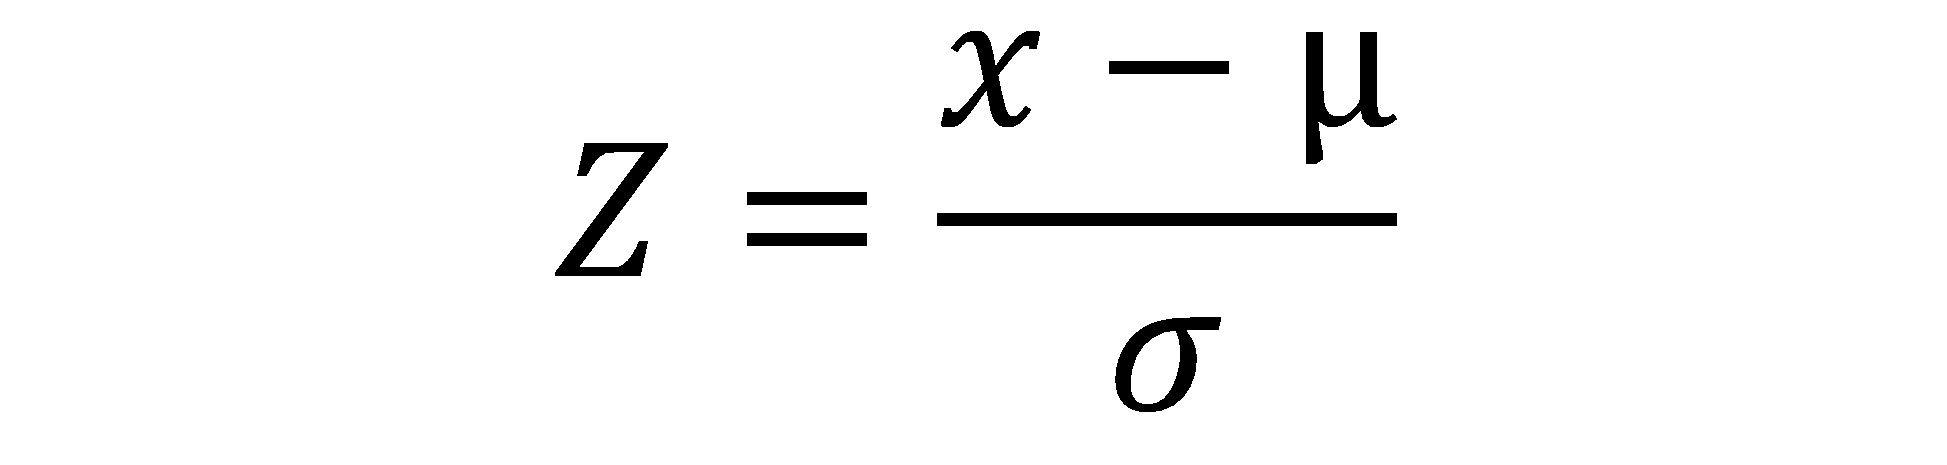

No normalizaremos las columnas que solo tienen valores binarios o booleanos ya que ya lo estan.

In [58]:
for i in X_test.columns:
  if i == "Loaned" or i == "Preferred Foot":
    pass
  elif i.startswith("clb_"):
    break
  else:
    X_test[i] = (X_test[i]-X_train[i].mean())/X_train[i].std()
    X_train[i] = (X_train[i]-X_train[i].mean())/X_train[i].std()

In [59]:
y_test = (y_test-y_train.mean())/y_train.std()
y_train = (y_train-y_train.mean())/y_train.std()

Ahora podemos entrenar nuestro modelo de regresion lineal y hacer una prediccion sobre la parte de testeo

In [60]:
reg = linear_model.LinearRegression().fit(X_train, y_train)

Utilizamos la metrica $R^2$ para la regresión, y usamos la implementación de <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html"> sickit-learn</a>.
La metrica $R^2$ determina la calidad del modelo para generalizar los resultados, y la proporción de variación de los resultados que puede explicar.
Sale de calcular el cuadrado del coeficiente de correlación de Pearson:
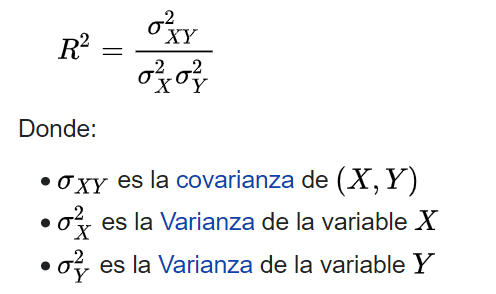



El $R^2$ adquiere valores entre 0 y 1. Existen casos dentro de la definición computacional de $R^2$ donde este valor puede tomar valores negativos si predice peor que predeciendo de forma aleatoria


In [61]:
preds = reg.predict(X_test)
r2_score(preds, y_test)

-0.0018628953143737803

In [62]:
preds = reg.predict(X_train)
r2_score(preds, y_train)

0.9618875584127543

Podemos obsevar que el modelo no sabe generalizar bien ya que nos hace una predicción muy buena prediciendo en el dataset del train con un R^2 de 0.9618, pero en el dataset del test sale una predicción de -0.0018. Es un claro caso de overfitting. 
Si miramos nuestro dataset podemos observar que tenemos muchas columnas que no nos aportan mucha información ya que hay muchos registros que tienen 0. Podemos observar que estas columnas son las que hemos creado a partir del one hot encoding.
Para solucionarlo eliminaremos esas columnas que tienen menos de 30 jugadores con esos valores.

In [63]:
X_train, X_test, y_train, y_test = train_test_split(df, val, test_size=0.33, random_state=42)

In [64]:
for i in X_test.columns:
  if i == "Loaned" or i == "Preferred Foot":
    pass
  elif i.startswith("clb_") or i.startswith("nat_") or i.startswith("pos_") or i.startswith("WR_") or i.startswith("body_"):
    if df[i].sum()<=30:
      X_train.pop(i)
      X_test.pop(i)
  else:
    X_test[i] = (X_test[i]-X_train[i].mean())/X_train[i].std()
    X_train[i] = (X_train[i]-X_train[i].mean())/X_train[i].std()


In [65]:
reg = linear_model.LinearRegression().fit(X_train, y_train)

In [66]:
preds = reg.predict(X_test)

In [67]:
r2_score(preds, y_test)

0.9698045715448264